# **Cartooning an Image using OpenCV**

In [1]:
%pip install opencv-python

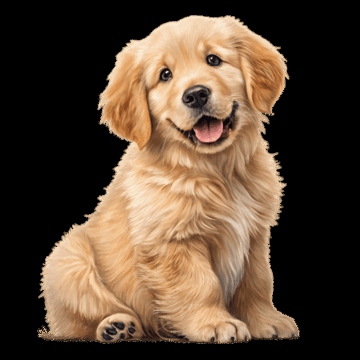

In [3]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("img3.png")

if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    cv2_imshow(img)

Saving img3.png to img3 (1).png


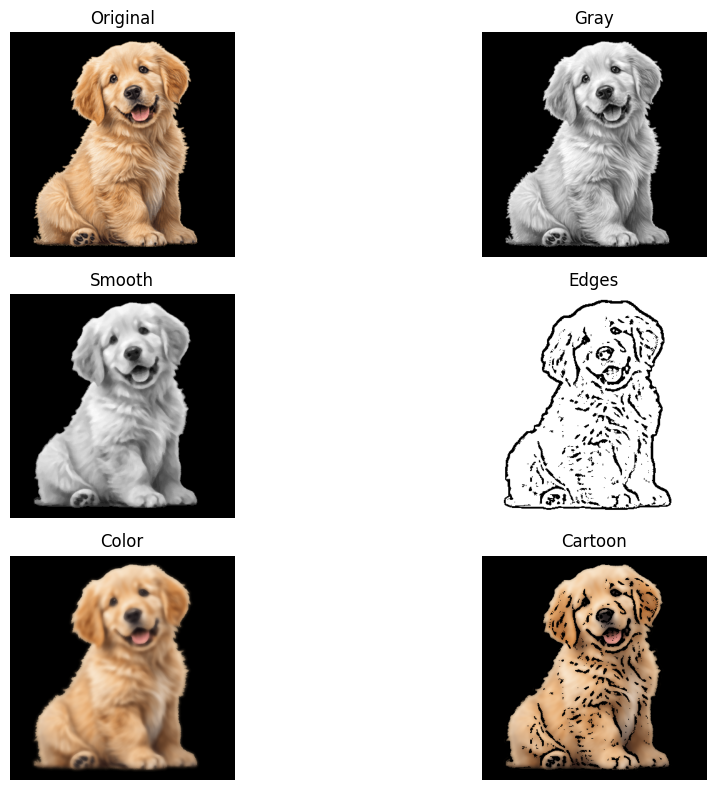

Cartoon image saved as: img3 (1)_cartoonified.jpg


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files
from PIL import Image
import io

# Function to apply cartoon effect on an image
def cartoonify(image_path):
    # Read the image using OpenCV
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for display

    # check if image was loaded successfully
    if original_image is None:
        print("Cannot find any image. Choose appropriate file.")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

    # Apply median blur to reduce noise
    smooth = cv2.medianBlur(gray, 5)

    # Detect edges using adaptive thresholding
    edges = cv2.adaptiveThreshold(smooth, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)

    # Apply bilateral filter to preserve edges while smoothing colors
    color = cv2.bilateralFilter(original_image, 9, 300, 300)

    # Combine edge mask with color image to get final cartoon effect
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    # Display all processing stages side-by-side
    titles = ['Original', 'Gray', 'Smooth', 'Edges', 'Color', 'Cartoon']
    images = [original_image, gray, smooth, edges, color, cartoon]

    plt.figure(figsize=(12, 8))
    for i in range(6):
        plt.subplot(3, 2, i+1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape)==2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Save the final cartoon image
    cartoon_bgr = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
    output_path = os.path.splitext(image_path)[0] + "_cartoonified.jpg"
    cv2.imwrite(output_path, cartoon_bgr)
    print(f"Cartoon image saved as: {output_path}")

# Upload image from local machine to Colab
uploaded = files.upload()

# Apply cartoonify function to each uploaded image
for fname in uploaded.keys():
    cartoonify(fname)

In [6]:
!pip install streamlit==1.41.1 pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [7]:
# create an account in ngrok website
# replace the [authtoken] with your Authtoken
!ngrok config add-authtoken [authtoken]

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [20]:
from pyngrok import ngrok

# Define the new port for the Streamlit app
new_port = 8513

# Run the Streamlit app on the new port
!streamlit run app.py --server.port {new_port} &>/content/logs.txt &

# Ensure all previous tunnels are closed before opening a new one
ngrok.kill()

# Start a new ngrok tunnel on the new port
public_url = ngrok.connect(new_port, "http")
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://770f-34-48-184-166.ngrok-free.app" -> "http://localhost:8513"


In [19]:
# Ensure all previous tunnels are closed before opening a new one
ngrok.kill()